In [0]:
from tensorflow.python.keras.layers import Dense,Input
from tensorflow.python.keras.models import Model

In [2]:
input_vec=Input(shape=(4096,))
encoder_layer1=Dense(1024,activation='relu')(input_vec)
encoder_layer2=Dense(256,activation='relu')(encoder_layer1)
encoded_vec=Dense(92,activation='relu')(encoder_layer2)

decoder_layer1=Dense(256,activation='relu')(encoded_vec)
decoder_layer2=Dense(1024,activation='relu')(decoder_layer1)
output=Dense(4096,activation='relu')(decoder_layer2)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
autoencoder_sktch=Model(input_vec,output)
Encoder_model_sktch=Model(input_vec,encoded_vec)

In [5]:
autoencoder_sktch.compile(optimizer='Adam', loss='mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [0]:
def Convert(dicts,dictionary):
  for a,b in dicts:
    dictionary.setdefault(a,[]).append(b)
import os
import numpy as np
dictionary={}
training_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
labels=os.listdir(training_files)
dicts=list(enumerate(labels))
Convert(dicts,dictionary)
x_train=[]
y_train=[]
for label in labels:
  img_names=os.listdir(os.path.join(training_files,label))
  #label_list
  for img in img_names:
    img_fea_path=os.path.join(training_files,label,img)
    img_fea=np.load(img_fea_path)
    x_train.append(img_fea)
    y_train.append(label+'-'+img)


In [7]:
list(dictionary.keys())[list(dictionary.values()).index(['basket'])]
#dictionary

0

Validation

In [0]:
val_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Validation'
labels=os.listdir(val_files)
x_val=[]
y_val=[]
for label in labels:
  img_names=os.listdir(os.path.join(val_files,label))
  for img in img_names:
    img_fea_path=os.path.join(val_files,label,img)
    img_fea=np.load(img_fea_path)
    x_val.append(img_fea)
    y_val.append(label+'-'+img)

In [0]:
x_train=np.asarray(x_train)
x_val=np.asarray(x_val)

In [10]:
x_train.shape

(5888, 4096)

In [11]:
x_val.shape

(736, 4096)

In [12]:
x=autoencoder_sktch.fit(x_train,x_train,epochs=34,batch_size=128,shuffle=True,validation_data=(x_val,x_val))#34

Train on 5888 samples, validate on 736 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/34
5888/5888 [==============================] - 3s 441us/sample - loss: 1.2455 - val_loss: 0.9071
Epoch 2/34
5888/5888 [==============================] - 1s 91us/sample - loss: 0.7860 - val_loss: 0.6581
Epoch 3/34
5888/5888 [==============================] - 1s 92us/sample - loss: 0.6073 - val_loss: 0.5589
Epoch 4/34
5888/5888 [==============================] - 1s 90us/sample - loss: 0.5202 - val_loss: 0.4975
Epoch 5/34
5888/5888 [==============================] - 1s 92us/sample - loss: 0.4636 - val_loss: 0.4599
Epoch 6/34
5888/5888 [==============================] - 1s 90us/sample - loss: 0.4217 - val_loss: 0.4349
Epoch 7/34
5888/5888 [==============================] - 1s 92us/sample - loss: 0.3921 - val_loss: 0.4090
Epoch 8/34
5888/5888 [==============================] - 1s 90us/sample - loss: 0.3665 - val_loss: 0.3942
Epoch 9/34
5888/5888 [==============================] - 1s 95us/

In [13]:
autoencoder_sktch.evaluate(x_val,x_val)

736/736 [==============================] - 0s 65us/sample - loss: 0.3029


0.30288334514783777

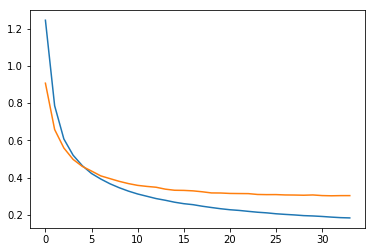

In [14]:
import matplotlib.pyplot as plt
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])

In [15]:
autoencoder_sktch.get_weights()

[array([[-0.02100636, -0.02187148,  0.03035247, ...,  0.00900165,
         -0.0130712 , -0.03106302],
        [-0.0146429 ,  0.05091914, -0.00551551, ...,  0.00814038,
         -0.02371992, -0.00986399],
        [-0.03355628, -0.02103235,  0.00712934, ..., -0.0266872 ,
          0.02939766,  0.0068551 ],
        ...,
        [ 0.00187917, -0.04130596, -0.01065101, ...,  0.00755164,
         -0.03041607,  0.0070265 ],
        [ 0.02500113,  0.01364125, -0.00465419, ..., -0.03060542,
          0.01909462, -0.03446716],
        [-0.00983025, -0.02268863, -0.03622418, ...,  0.02680546,
         -0.00643094,  0.01351467]], dtype=float32),
 array([-0.00417623,  0.00227784, -0.00114516, ..., -0.00327934,
        -0.00386705, -0.00309427], dtype=float32),
 array([[-0.0034225 , -0.03826846, -0.07646245, ...,  0.00793765,
          0.01077766,  0.05458291],
        [-0.06253168,  0.0498083 ,  0.06032692, ..., -0.0403633 ,
         -0.00470239, -0.01681907],
        [-0.06870636, -0.04765707,  0.

In [0]:
encoded_layer_sketch_model=Model(input_vec,encoded_vec)

In [47]:
encoded_layer_sketch_model.get_weights()
#encoded_layer_sketch_model=Model(input_vec,encoded_vec)
#encoded_layer_sketch_model.summary()

[array([[-0.02100636, -0.02187148,  0.03035247, ...,  0.00900165,
         -0.0130712 , -0.03106302],
        [-0.0146429 ,  0.05091914, -0.00551551, ...,  0.00814038,
         -0.02371992, -0.00986399],
        [-0.03355628, -0.02103235,  0.00712934, ..., -0.0266872 ,
          0.02939766,  0.0068551 ],
        ...,
        [ 0.00187917, -0.04130596, -0.01065101, ...,  0.00755164,
         -0.03041607,  0.0070265 ],
        [ 0.02500113,  0.01364125, -0.00465419, ..., -0.03060542,
          0.01909462, -0.03446716],
        [-0.00983025, -0.02268863, -0.03622418, ...,  0.02680546,
         -0.00643094,  0.01351467]], dtype=float32),
 array([-0.00417623,  0.00227784, -0.00114516, ..., -0.00327934,
        -0.00386705, -0.00309427], dtype=float32),
 array([[-0.0034225 , -0.03826846, -0.07646245, ...,  0.00793765,
          0.01077766,  0.05458291],
        [-0.06253168,  0.0498083 ,  0.06032692, ..., -0.0403633 ,
         -0.00470239, -0.01681907],
        [-0.06870636, -0.04765707,  0.

In [0]:
#training set
import os
import numpy as np 
training_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
labels=os.listdir(training_files)
training_query_sketch=[]
training_query_skt_label=[]
#z=0
for label in labels:
  img_names=os.listdir(os.path.join(training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(training_files,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    training_query_sketch.append(encoded_layer_sketch_model.predict(img_fea))
    training_query_skt_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  #z=z+1

In [19]:
img_fea

array([[6.3018627 , 0.66493726, 0.        , ..., 0.        , 0.72607875,
        0.        ]], dtype=float32)

In [0]:
#testing set 
testing_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Testing'
labels=os.listdir(testing_files)
testing_query_sketch=[]
testing_query_skt_label=[]
z=0
for label in labels:
  img_names=os.listdir(os.path.join(training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(training_files,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    testing_query_sketch.append(encoded_layer_sketch_model.predict(img_fea))
    testing_query_skt_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  z=z+1

### **For** **Images**

In [0]:
input_vec=Input(shape=(4096,))
encoder_layer1=Dense(1024,activation='relu')(input_vec)
encoder_layer2=Dense(256,activation='relu')(encoder_layer1)
encoded_vec=Dense(92,activation='relu')(encoder_layer2)

decoder_layer1=Dense(256,activation='relu')(encoded_vec)
decoder_layer2=Dense(1024,activation='relu')(decoder_layer1)
output=Dense(4096,activation='relu')(decoder_layer2)

In [0]:
autoencoder_img=Model(input_vec,output)
Encoder_model_images=Model(input_vec,encoded_vec)

In [0]:
autoencoder_img.compile(optimizer='Adam', loss='mean_squared_error')

In [0]:
import os
import numpy as np 
training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
labels=os.listdir(training_files)
x_train_img=[]
y_train_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(training_files,label,img)
    img_fea=np.load(img_fea_path)
    x_train_img.append(img_fea)
    y_train_img.append(label+'-'+img)


In [0]:
x_train_img=np.asarray(x_train_img)

In [26]:
x_train_img[0]

array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 8.377775],
      dtype=float32)

In [27]:
y_train_img[64]

'arm-1162.npy'

In [0]:
val_files_im='/content/gdrive/My Drive/Feature_Vectors/Image/Validation'
labels=os.listdir(val_files_im)
x_val_img=[]
y_val_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(val_files,label))
  for img in img_names:
    img_fea_path=os.path.join(val_files,label,img)
    img_fea=np.load(img_fea_path)
    x_val_img.append(img_fea)
    y_val_img.append(label+'-'+img)

In [0]:
x_val_img=np.asarray(x_val_img)

In [30]:
x_val_img.shape

(736, 4096)

In [31]:
x_val_img[0]

array([1.6120474, 0.       , 0.       , ..., 0.       , 0.       ,
       3.1378531], dtype=float32)

In [32]:
y_val_img[9]

'arm-466.npy'

In [33]:
r=autoencoder_img.fit(x_train_img,x_train_img,epochs=28,batch_size=128,shuffle=True,validation_data=(x_val_img,x_val_img))#28

Train on 5888 samples, validate on 736 samples
Epoch 1/28
5888/5888 [==============================] - 1s 245us/sample - loss: 1.7676 - val_loss: 1.2926
Epoch 2/28
5888/5888 [==============================] - 1s 88us/sample - loss: 1.1848 - val_loss: 1.2075
Epoch 3/28
5888/5888 [==============================] - 1s 86us/sample - loss: 0.9424 - val_loss: 1.1486
Epoch 4/28
5888/5888 [==============================] - 1s 90us/sample - loss: 0.8229 - val_loss: 1.1000
Epoch 5/28
5888/5888 [==============================] - 1s 88us/sample - loss: 0.7377 - val_loss: 1.0655
Epoch 6/28
5888/5888 [==============================] - 1s 87us/sample - loss: 0.6723 - val_loss: 1.0327
Epoch 7/28
5888/5888 [==============================] - 1s 88us/sample - loss: 0.6235 - val_loss: 1.0161
Epoch 8/28
5888/5888 [==============================] - 1s 86us/sample - loss: 0.5818 - val_loss: 0.9985
Epoch 9/28
5888/5888 [==============================] - 1s 88us/sample - loss: 0.5492 - val_loss: 0.9849
Epoch 1

In [34]:
r.history.keys()

dict_keys(['loss', 'val_loss'])

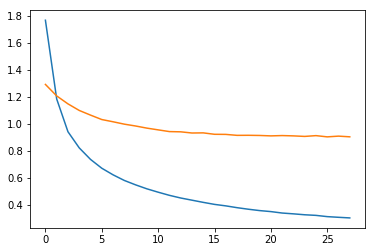

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [36]:
#encoded_layer_sketch_model.get_weights()
encoded_layer_img_model=Model(input_vec,encoded_vec)
encoded_layer_img_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_8 (Dense)              (None, 92)                23644     
Total params: 4,481,372
Trainable params: 4,481,372
Non-trainable params: 0
_________________________________________________________________


In [48]:
autoencoder_img.get_weights()

[array([[ 0.0074121 ,  0.02897015, -0.01586568, ...,  0.02228772,
          0.01342586, -0.04631565],
        [-0.00455005,  0.01902666, -0.00412604, ..., -0.02403993,
          0.06144308,  0.01454574],
        [ 0.0121893 , -0.00569594, -0.00626692, ...,  0.02353417,
         -0.00211188, -0.03230889],
        ...,
        [-0.03343311, -0.00176175, -0.03174973, ..., -0.00340482,
         -0.04252531, -0.01262808],
        [-0.00519588,  0.00221269, -0.01010627, ...,  0.02958842,
          0.01566301, -0.04911966],
        [-0.00138922, -0.02644127, -0.03346795, ..., -0.01690126,
          0.00260546, -0.00342113]], dtype=float32),
 array([-0.00451617, -0.00448497, -0.0042046 , ..., -0.00333467,
         0.01455511,  0.00337163], dtype=float32),
 array([[-0.01738002,  0.02651386,  0.03035406, ...,  0.03201681,
          0.02028449,  0.029108  ],
        [-0.0034916 , -0.00559314, -0.01292252, ...,  0.06214548,
          0.02637022, -0.02734181],
        [ 0.05578367, -0.05250781,  0.

In [49]:
encoded_layer_img_model.get_weights()

[array([[ 0.0074121 ,  0.02897015, -0.01586568, ...,  0.02228772,
          0.01342586, -0.04631565],
        [-0.00455005,  0.01902666, -0.00412604, ..., -0.02403993,
          0.06144308,  0.01454574],
        [ 0.0121893 , -0.00569594, -0.00626692, ...,  0.02353417,
         -0.00211188, -0.03230889],
        ...,
        [-0.03343311, -0.00176175, -0.03174973, ..., -0.00340482,
         -0.04252531, -0.01262808],
        [-0.00519588,  0.00221269, -0.01010627, ...,  0.02958842,
          0.01566301, -0.04911966],
        [-0.00138922, -0.02644127, -0.03346795, ..., -0.01690126,
          0.00260546, -0.00342113]], dtype=float32),
 array([-0.00451617, -0.00448497, -0.0042046 , ..., -0.00333467,
         0.01455511,  0.00337163], dtype=float32),
 array([[-0.01738002,  0.02651386,  0.03035406, ...,  0.03201681,
          0.02028449,  0.029108  ],
        [-0.0034916 , -0.00559314, -0.01292252, ...,  0.06214548,
          0.02637022, -0.02734181],
        [ 0.05578367, -0.05250781,  0.

In [0]:
def eval_MAP_K(query_set, search_set, query_label, search_set_label, K):
    query_class_arr = query_set
    search_set_class_arr = search_set
    query_label_arr = query_label
    query_label_arr.astype(int)
    search_set_label_arr = search_set_label
    search_set_label_arr.astype(int)
    num_query_sample = query_label_arr.shape[0]
    dist_q_search_class = cdist(query_class_arr,search_set_class_arr,metric='euclidean')
    AP=0
    pre=0
    for query_count in range(0,num_query_sample):
      actual_label = query_label_arr[query_count]
      value=dist_q_search_class[query_count,:]
      sorted_value_idx=value.argsort()
      predicted_K_label = search_set_label_arr[sorted_value_idx[0:K]]
      L=np.sum((np.in1d(predicted_K_label,actual_label)).astype(int))
      P=0
      for r in range(0,K):
        rtr_label_r = predicted_K_label[:(r+1)]
        l=np.sum((np.in1d(rtr_label_r,actual_label)).astype(int))
        precision=l/(r+1)
        if actual_label==predicted_K_label[r]:
          delta=1
        else:
          delta=0
        P=P+(precision*delta)
      if L!=0:
        AP=AP+((1/L)*P)
    map_K=AP/num_query_sample
    return map_K

In [0]:
training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
labels=os.listdir(training_files)
training_query_img=[]
training_query_img_label=[]
z=0
for label in labels:
  img_names=os.listdir(os.path.join(training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(training_files,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    training_query_img.append(encoded_layer_img_model.predict(img_fea))
    training_query_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  z=z+1


    
testing_files='/content/gdrive/My Drive/Feature_Vectors/Image/Testing'
labels=os.listdir(testing_files)
testing_query_img=[]
testing_query_img_label=[]
z=0
for label in labels:
  img_names=os.listdir(os.path.join(testing_files,label))
  for img in img_names:
    img_fea_path=os.path.join(testing_files,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    testing_query_img.append(encoded_layer_img_model.predict(img_fea))
    testing_query_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  z=z+1


In [0]:
#training_query_skt_label.shape

In [40]:
from scipy.spatial.distance import cdist
training_query_sketch=np.squeeze(np.asarray(training_query_sketch))
training_query_img=np.squeeze(np.asarray(training_query_img))
training_query_skt_label=np.asarray(training_query_skt_label)
training_query_img_label=np.asarray(training_query_img_label)
eval_MAP_K(training_query_sketch,training_query_img,training_query_skt_label,training_query_img_label,100)

0.023609790109393437

In [0]:
testing_files='/content/gdrive/My Drive/Feature_Vectors/Image/Testing'
labels=os.listdir(testing_files)
testing_query_img=[]
testing_query_img_label=[]
z=0
for label in labels:
  img_names=os.listdir(os.path.join(testing_files,label))
  for img in img_names:
    img_fea_path=os.path.join(testing_files,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    testing_query_img.append(encoded_layer_img_model.predict(img_fea))
    testing_query_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  z=z+1

In [46]:
#from scipy.spatial.distance import cdist
testing_query_sketch=np.squeeze(np.asarray(testing_query_sketch))
testing_query_img=np.squeeze(np.asarray(testing_query_img))
testing_query_skt_label=np.asarray(testing_query_skt_label)
testing_query_img_label=np.asarray(testing_query_img_label)
eval_MAP_K(testing_query_sketch,testing_query_img,testing_query_skt_label,testing_query_img_label,100)

0.032014896404548535